<a href="https://colab.research.google.com/github/Dinuki-Lejinarathna/2054866_DSPL_Week7/blob/main/DSPL_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Observation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
dataset_path = "/content/test.csv"
df_test = pd.read_csv(dataset_path)

df_test.head()

Customer_ID outlet_city luxury_sales fresh_sales dry_sales
0        33574  batticaloa       2686.5        3582     12537
1        10089  batticaloa      1717.56     2576.34   9446.58
2        38329  batticaloa       854.04     1242.24   5201.88
3        11376  batticaloa      1638.12     2320.67   9282.68
4        12410  batticaloa      1039.09     1518.67   5435.24

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df_test.describe()

Customer_ID
count  40749.000000
mean   20375.000000
std    11763.367396
min        1.000000
25%    10188.000000
50%    20375.000000
75%    30562.000000
max    40749.000000

In [ ]:
df_test.describe(include='object')

outlet_city luxury_sales fresh_sales dry_sales
count        40749        40749       40749     40749
unique          27        33183       36100     35771
top         Jaffna       1801.8     6606.87    1327.2
freq          2226            7           5         5

In [ ]:
df_test.shape

(40749, 5)

In [ ]:
# Create metadata DataFrame for all columns
metadata = pd.DataFrame({

    "column": df_test.columns,
    "data_type": [str(df_test[col].dtypes) for col in df_test.columns],
    "Non_Null_Count": [df_test[col].count() for col in df_test.columns],
    "unique_values": [df_test[col].nunique() for col in df_test.columns],
    "Mean": [df_test[col].mean() if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "Median": [df_test[col].median() if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "Min": [df_test[col].min() if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "Max": [df_test[col].max() if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "Std_Dev": [df_test[col].std() if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "25th_Percentile": [df_test[col].quantile(0.25) if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "50th_Percentile": [df_test[col].quantile(0.50) if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns],
    "75th_Percentile": [df_test[col].quantile(0.75) if pd.api.types.is_numeric_dtype(df_test[col]) else None for col in df_test.columns]
})


# Display the metadata DataFrame
print(metadata)


         column data_type  Non_Null_Count  unique_values     Mean   Median  \
0   Customer_ID     int64           40749          40749  20375.0  20375.0   
1   outlet_city    object           40749             27      NaN      NaN   
2  luxury_sales    object           40749          33183      NaN      NaN   
3   fresh_sales    object           40749          36100      NaN      NaN   
4     dry_sales    object           40749          35771      NaN      NaN   

   Min      Max       Std_Dev  25th_Percentile  50th_Percentile  \
0  1.0  40749.0  11763.367396          10188.0          20375.0   
1  NaN      NaN           NaN              NaN              NaN   
2  NaN      NaN           NaN              NaN              NaN   
3  NaN      NaN           NaN              NaN              NaN   
4  NaN      NaN           NaN              NaN              NaN   

   75th_Percentile  
0          30562.0  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


In [ ]:
# Display Columns
list(df_test.columns)

['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales']

In [ ]:
# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df_test.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {column}:")
    print(df_test[column].unique())


Unique Values in Categorical Columns:

Unique values for outlet_city:
['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']

Unique values for luxury_sales:
['2686.5' '1717.56' '854.04' ... '3838.6' '4313.76' '4212.16']

Unique values for fresh_sales:
['3582' '2576.34' '1242.24' ... '3951.5' '4183.04' '4212.16']

Unique values for dry_sales:
['12537' '9446.58' '5201.88' ... '3098.04'
 'Three Thousand seven hundread ruppees' '4313.76']


In [ ]:
# Check for missing values
missing_values = df_test.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [ ]:
df_test.isna().sum()/len(df_test)*100

Customer_ID     0.0
outlet_city     0.0
luxury_sales    0.0
fresh_sales     0.0
dry_sales       0.0
dtype: float64

In [ ]:
#pip install plotly
import plotly.express as px

luxury_sales_fig = px.histogram(df_test, x='luxury_sales')
luxury_sales_fig.show()

fresh_sales_fig = px.histogram(df_test, x='fresh_sales')
fresh_sales_fig.show()

dry_sales_fig = px.histogram(df_test, x='dry_sales')
dry_sales_fig.show()


In [ ]:
# Check for duplicate rows
duplicates = df_test.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [ ]:
#Visualizing outliers

luxury_sales = px.box(df_test, x='luxury_sales')
luxury_sales.show()

fresh_sales = px.box(df_test, x='fresh_sales')
fresh_sales.show()

dry_sales = px.box(df_test, x='dry_sales')
dry_sales.show()


# Preprocessing

In [ ]:
# Convert 'luxury_sales', 'fresh_sales', and 'dry_sales' to numeric
df_test['luxury_sales'] = pd.to_numeric(df_test['luxury_sales'], errors='coerce')
df_test['fresh_sales'] = pd.to_numeric(df_test['fresh_sales'], errors='coerce')
df_test['dry_sales'] = pd.to_numeric(df_test['dry_sales'], errors='coerce')

#median imputation
df_test['luxury_sales'].fillna(df_test['luxury_sales'].median(), inplace=True)
df_test['fresh_sales'].fillna(df_test['fresh_sales'].median(), inplace=True)
df_test['dry_sales'].fillna(df_test['dry_sales'].median(), inplace=True)

<ipython-input-15-62a4ecce7946>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-15-62a4ecce7946>:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

Reference : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
# Print original data
print("Before:\n", df_test['outlet_city'].unique())

Before:
 ['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']


In [ ]:
# Replace 'batticaloa' with 'Batticaloa'
df_test['outlet_city'] = df_test['outlet_city'].replace({'batticaloa': 'Batticaloa'})

# Replace 'kalmunai' with 'Kalmunai'
df_test['outlet_city'] = df_test['outlet_city'].replace({'kalmunai': 'Kalmunai'})

# Replace 'MoraTuwa' with 'Moratuwa'
df_test['outlet_city'] = df_test['outlet_city'].replace({'MoraTuwa': 'Moratuwa'})

# Replace 'PeliyagodA' with 'Peliyagoda'
df_test['outlet_city'] = df_test['outlet_city'].replace({'PeliyagodA': 'Peliyagoda'})

# Replace 'Trincomale' with 'Trincomalee'
df_test['outlet_city'] = df_test['outlet_city'].replace({'Trincomale': 'Trincomalee'})

In [ ]:
# Print updated data
print("After:\n", df_test['outlet_city'].unique())

After:
 ['Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia' 'Anuradhapura' 'Galle'
 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela' 'Kalmunai' 'Kandy' 'Katunayake'
 'Kelaniya' 'Madawachiya' 'Kotte' 'Moratuwa' 'Negombo' 'Nuwara Eliya'
 'Panadura' 'Peliyagoda' 'Trincomalee' 'Wattala']


In [ ]:
#changing data types

# Convert data types
df_test['Customer_ID'] = df_test['Customer_ID'].astype('object')
df_test['luxury_sales'] = df_test['luxury_sales'].astype('float')
df_test['fresh_sales'] = df_test['fresh_sales'].astype('float')
df_test['dry_sales'] = df_test['dry_sales'].astype('float')

In [ ]:
#Cheacking the misiing values
df_test.isnull().sum()

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64

In [ ]:
# Encoding categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['city_encoded'] = label_encoder.fit_transform(df_test['outlet_city'])

In [ ]:
df_test.head()

Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  city_encoded
0       33574  Batticaloa       2686.50      3582.00   12537.00             1
1       10089  Batticaloa       1717.56      2576.34    9446.58             1
2       38329  Batticaloa        854.04      1242.24    5201.88             1
3       11376  Batticaloa       1638.12      2320.67    9282.68             1
4       12410  Batticaloa       1039.09      1518.67    5435.24             1

In [ ]:
def find_outliers_IQR(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  IQR=q3-q1
  outliers = data[((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR)))]
  return outliers


In [ ]:
outliers = find_outliers_IQR(df_test['luxury_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 1841


1867     5516.94
1876     5272.74
1878     4911.00
1884     4597.44
1886     4428.50
          ...   
40736    4388.04
40737    4261.29
40739    4103.12
40747    4313.76
40748    4212.16
Name: luxury_sales, Length: 1841, dtype: float64

In [ ]:
outliers = find_outliers_IQR(df_test['fresh_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


Series([], Name: fresh_sales, dtype: float64)

In [ ]:
outliers = find_outliers_IQR(df_test['dry_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


Series([], Name: dry_sales, dtype: float64)

In [ ]:
luxury_sales = px.box(df_test, x='luxury_sales')
luxury_sales.show()

fresh_sales = px.box(df_test, x='fresh_sales')
fresh_sales.show()

dry_sales = px.box(df_test, x='dry_sales')
dry_sales.show()


# EDA

Univariate analysis

In [ ]:
#number of records for each unique city.
df_test.value_counts(subset = df_test.outlet_city)

outlet_city
Kalmunai                  2233
Jaffna                    2226
Gampaha                   2198
Katunayake                2157
Negombo                   2129
Batticaloa                2119
Kandy                     2101
Colombo                   2092
Trincomalee               2072
Peliyagoda                2041
Dehiwala-Mount Lavinia    1981
Nuwara Eliya              1963
Kaduwela                  1943
Wattala                   1938
Kelaniya                  1934
Homagama                  1930
Moratuwa                  1903
Panadura                  1810
Anuradhapura              1645
Madawachiya               1499
Galle                      456
Kotte                      379
Name: count, dtype: int64

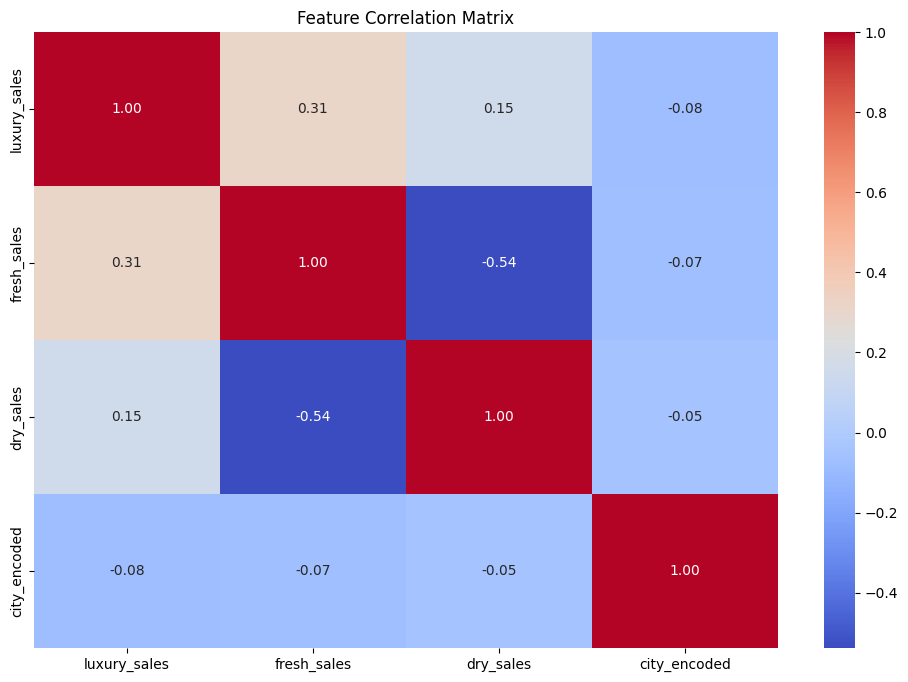

In [ ]:
# Correlation heatmap (Only numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_test.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

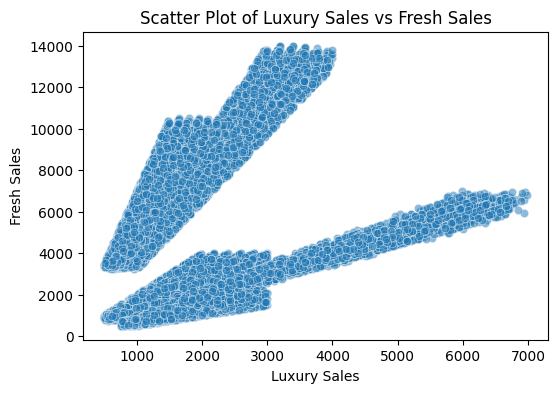

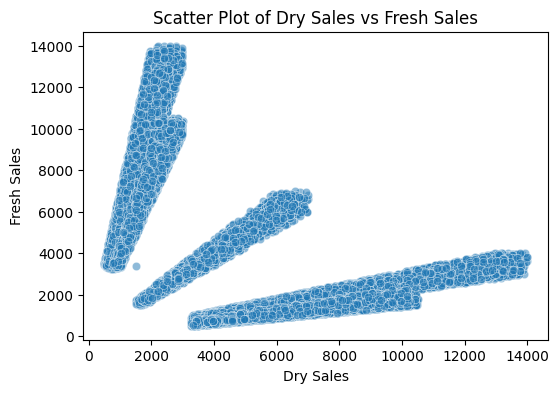

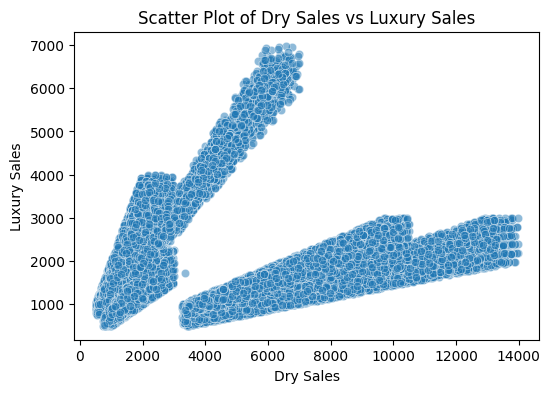

In [ ]:
# Scatter plot for relationship between luxury sales and fresh sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_test["luxury_sales"], y=df_test["fresh_sales"], alpha=0.5)
plt.title("Scatter Plot of Luxury Sales vs Fresh Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.show()

# Scatter plot for relationship between dry sales and fresh sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_test["dry_sales"], y=df_test["fresh_sales"], alpha=0.5)
plt.title("Scatter Plot of Dry Sales vs Fresh Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.show()

# Scatter plot for relationship between dry sales and luxury sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_test["dry_sales"], y=df_test["luxury_sales"], alpha=0.5)
plt.title("Scatter Plot of Dry Sales vs Luxury Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Luxury Sales")
plt.show()


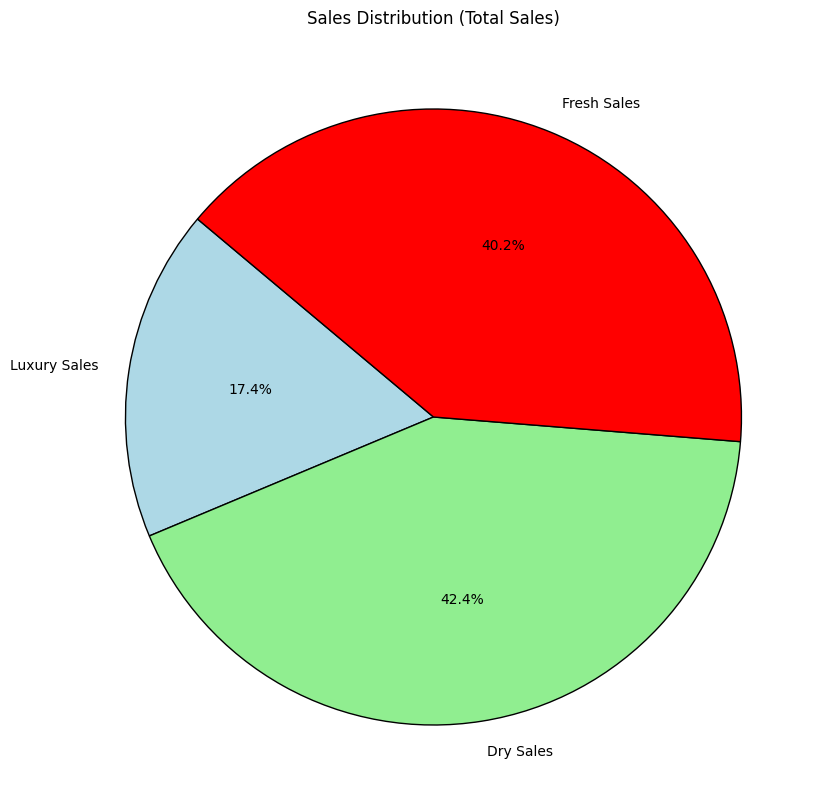

In [ ]:
# Calculate total sales for each category
total_luxury = df_test['luxury_sales'].sum()
total_dry = df_test['dry_sales'].sum()
total_fresh = df_test['fresh_sales'].sum()

# Data and labels for pie chart
sales_totals = [total_luxury, total_dry, total_fresh]
labels = ['Luxury Sales', 'Dry Sales', 'Fresh Sales']
colors = ['lightblue', 'lightgreen', 'red']

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(sales_totals, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Sales Distribution (Total Sales)')

# Show chart
plt.show()

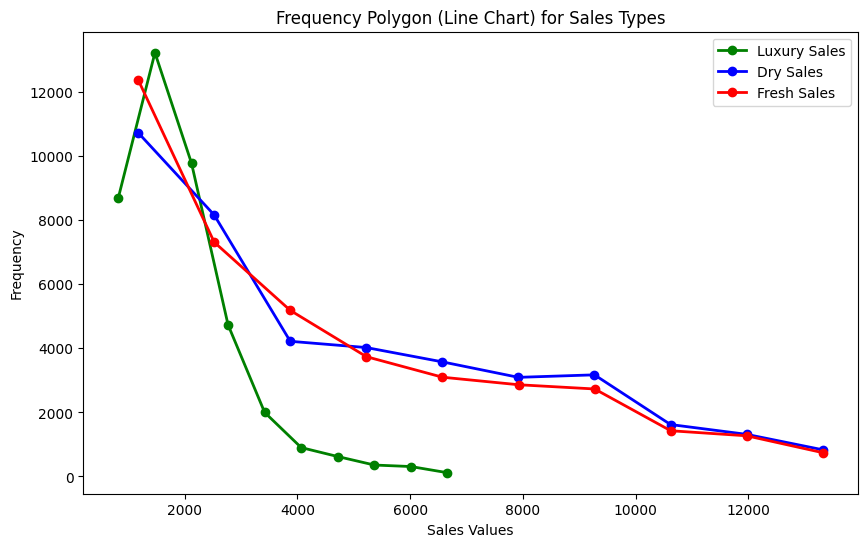

In [ ]:
# Create histogram data for each column
counts_luxury, bin_edges_luxury = np.histogram(df_test['luxury_sales'], bins=10)
bin_mids_luxury = 0.5 * (bin_edges_luxury[1:] + bin_edges_luxury[:-1])

counts_dry, bin_edges_dry = np.histogram(df_test['dry_sales'], bins=10)
bin_mids_dry = 0.5 * (bin_edges_dry[1:] + bin_edges_dry[:-1])

counts_fresh, bin_edges_fresh = np.histogram(df_test['fresh_sales'], bins=10)
bin_mids_fresh = 0.5 * (bin_edges_fresh[1:] + bin_edges_fresh[:-1])

# Plot line charts for all three columns
plt.figure(figsize=(10, 6))

plt.plot(bin_mids_luxury, counts_luxury, marker='o', color='green', linewidth=2, label='Luxury Sales')
plt.plot(bin_mids_dry, counts_dry, marker='o',color='blue', linewidth=2, label='Dry Sales')
plt.plot(bin_mids_fresh, counts_fresh,marker='o', color='red', linewidth=2, label='Fresh Sales')

# Add titles, labels, legend
plt.title('Frequency Polygon (Line Chart) for Sales Types')
plt.xlabel('Sales Values')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()
